In [1]:
!pip install squarify
!pip install statsmodels
!pip install seaborn
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import seaborn as sns
import squarify
from scipy.stats import kstest,norm
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/cp2/2019-Oct.csv')

In [5]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [7]:
df = df.dropna()

In [8]:
df.shape

(26560620, 9)

In [9]:
df['brand'].value_counts()
df['event_type'].value_counts()

view        25201706
cart          809407
purchase      549507
Name: event_type, dtype: int64

In [11]:
view_count = df['event_type'].value_counts()[0]
cart_count = df['event_type'].value_counts()[1]
purchase_count = df['event_type'].value_counts()[2]
print("View에서 Purchase 전환율" +str((purchase_count/view_count)*100) +'%')
print("View에서 Cart 전환율" +str((cart_count/view_count)*100) +'%')
print("Cart에서 Purchase 전환율" +str((purchase_count/cart_count)*100) +'%')

View에서 Purchase 전환율2.1804357212960106%
View에서 Cart 전환율3.2117151116674405%
Cart에서 Purchase 전환율67.8900726087123%


In [13]:
df.loc[df.user_session =="2c4a573c-bd92-466c-b2ba-60cd88f49d15"].sort_values(by = "event_time")

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
41811972,2019-10-31 12:00:26 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,952.37,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41814634,2019-10-31 12:03:07 UTC,view,1005105,2053013555631882655,electronics.smartphone,apple,1349.17,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41816969,2019-10-31 12:05:32 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,952.37,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41818113,2019-10-31 12:06:46 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,952.37,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41818425,2019-10-31 12:07:08 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,952.37,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41819836,2019-10-31 12:08:36 UTC,cart,1005115,2053013555631882655,electronics.smartphone,apple,952.37,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41843416,2019-10-31 12:32:12 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,952.37,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41843940,2019-10-31 12:32:47 UTC,view,1005104,2053013555631882655,electronics.smartphone,apple,991.47,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41851759,2019-10-31 12:40:33 UTC,view,1005104,2053013555631882655,electronics.smartphone,apple,991.47,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41851856,2019-10-31 12:40:39 UTC,view,1005104,2053013555631882655,electronics.smartphone,apple,991.47,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15


In [14]:
user_ID = 518267348
df.loc[df['user_id'] == user_ID]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
41811972,2019-10-31 12:00:26 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,952.37,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41814634,2019-10-31 12:03:07 UTC,view,1005105,2053013555631882655,electronics.smartphone,apple,1349.17,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41816969,2019-10-31 12:05:32 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,952.37,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41818113,2019-10-31 12:06:46 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,952.37,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41818425,2019-10-31 12:07:08 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,952.37,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41819836,2019-10-31 12:08:36 UTC,cart,1005115,2053013555631882655,electronics.smartphone,apple,952.37,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41843416,2019-10-31 12:32:12 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,952.37,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41843940,2019-10-31 12:32:47 UTC,view,1005104,2053013555631882655,electronics.smartphone,apple,991.47,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41851759,2019-10-31 12:40:33 UTC,view,1005104,2053013555631882655,electronics.smartphone,apple,991.47,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15
41851856,2019-10-31 12:40:39 UTC,view,1005104,2053013555631882655,electronics.smartphone,apple,991.47,518267348,2c4a573c-bd92-466c-b2ba-60cd88f49d15


In [15]:
user_ID = 513351129
df.loc[df['user_id'] == user_ID]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1784033,2019-10-02 10:44:17 UTC,view,1004785,2053013555631882655,electronics.smartphone,huawei,276.67,513351129,14a86681-3bb8-401c-b48b-7147804a6697
1784133,2019-10-02 10:44:25 UTC,view,1004781,2053013555631882655,electronics.smartphone,huawei,275.43,513351129,14a86681-3bb8-401c-b48b-7147804a6697
1784417,2019-10-02 10:44:41 UTC,view,1004848,2053013555631882655,electronics.smartphone,huawei,663.85,513351129,14a86681-3bb8-401c-b48b-7147804a6697
1784564,2019-10-02 10:44:51 UTC,view,1004848,2053013555631882655,electronics.smartphone,huawei,663.85,513351129,14a86681-3bb8-401c-b48b-7147804a6697
2259061,2019-10-02 17:23:54 UTC,view,1004785,2053013555631882655,electronics.smartphone,huawei,274.91,513351129,b55bfeb2-b998-4995-b046-6b122638e956
2259971,2019-10-02 17:24:38 UTC,view,1004785,2053013555631882655,electronics.smartphone,huawei,274.91,513351129,b55bfeb2-b998-4995-b046-6b122638e956
2428406,2019-10-02 22:45:29 UTC,view,1004870,2053013555631882655,electronics.smartphone,samsung,286.84,513351129,5a7ba219-fdb5-4f59-8be9-55570daaa708
21769623,2019-10-16 17:40:53 UTC,view,4803977,2053013554658804075,electronics.audio.headphone,samsung,107.49,513351129,66f2a2b4-f260-4f60-a7f3-11a3b4668eec


In [16]:
cart_purchase_users = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])
cart_purchase_users.dropna(how='any', inplace=True)
print(cart_purchase_users)

                       event_time event_type  product_id          category_id  \
162       2019-10-01 00:02:14 UTC   purchase     1004856  2053013555631882655   
308       2019-10-01 00:04:37 UTC   purchase     1002532  2053013555631882655   
442       2019-10-01 00:07:07 UTC   purchase    13800054  2053013557418656265   
574       2019-10-01 00:09:26 UTC   purchase     4804055  2053013554658804075   
583       2019-10-01 00:09:33 UTC       cart     1002524  2053013555631882655   
...                           ...        ...         ...                  ...   
42446904  2019-10-31 23:45:04 UTC   purchase     1002524  2053013555631882655   
42447440  2019-10-31 23:49:30 UTC   purchase     1003316  2053013555631882655   
42447449  2019-10-31 23:49:32 UTC   purchase     1002524  2053013555631882655   
42447581  2019-10-31 23:50:34 UTC       cart     1005256  2053013555631882655   
42448124  2019-10-31 23:55:07 UTC       cart     1005134  2053013555631882655   

                        cat

In [17]:
cart_purchase_users_all_activity = df.loc[df['user_id'].isin(cart_purchase_users['user_id'])]
print(cart_purchase_users_all_activity)

                       event_time event_type  product_id          category_id  \
5         2019-10-01 00:00:05 UTC       view     1480613  2053013561092866779   
22        2019-10-01 00:00:22 UTC       view     1480714  2053013561092866779   
23        2019-10-01 00:00:23 UTC       view     1004739  2053013555631882655   
36        2019-10-01 00:00:28 UTC       view    28714755  2053013565228450757   
45        2019-10-01 00:00:35 UTC       view     3601505  2053013563810775923   
...                           ...        ...         ...                  ...   
42448730  2019-10-31 23:59:48 UTC       view     1004901  2053013555631882655   
42448731  2019-10-31 23:59:49 UTC       view     1307449  2053013558920217191   
42448735  2019-10-31 23:59:51 UTC       view     1005014  2053013555631882655   
42448740  2019-10-31 23:59:52 UTC       view     1002524  2053013555631882655   
42448749  2019-10-31 23:59:55 UTC       view     5800263  2053013553945772349   

                        cat

In [18]:
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
activity_in_session = activity_in_session.rename(columns={"event_type":"activity_count"})
print(activity_in_session)

                                 user_session  activity_count
0        00000083-8816-4d58-a9b8-f52f54186edc              18
1        000001fd-1f89-45e8-a3ce-fe3218cabfad              11
2        000003eb-b63e-45d9-9f26-f229057c654a               1
3        00000809-9101-4e4b-9795-e6cbafccfe19               4
4        00000aaa-d774-49bc-9c31-0c9f6e1c2f0a               1
...                                       ...             ...
2158282  ffffaa22-7177-4820-849e-3130c634ada3               4
2158283  ffffaa7e-6a84-47e8-aa8a-693be5f66120               1
2158284  ffffd6fe-a5c3-4c9e-bc57-8d7601521cc0               2
2158285  ffffd89d-208c-28ec-da2f-6668c878fffc               1
2158286  ffffe3ba-7c09-4c3a-a8fe-75ba46b1e146               2

[2158287 rows x 2 columns]


In [19]:
def convert_time_to_date(utc_timestamp):
  utc_date = datetime.strptime(utc_timestamp[0:10],'%Y-%m-%d').date()
  return utc_date

In [20]:
df['event_date'] = df['event_time'].apply(lambda s:convert_time_to_date(s))

In [21]:
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn import metrics

In [22]:
df_targets = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'user_id','user_session'])
df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)
df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")
df_targets = df_targets.loc[df_targets["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])
df_targets['event_weekday'] = df_targets['event_time'].apply(lambda s: str(datetime.strptime(str(s)[0:10], "%Y-%m-%d").weekday()))
df_targets.dropna(how='any', inplace=True)
df_targets["category_code_level1"] = df_targets["category_code"].str.split(".",expand=True)[0].astype('category')
df_targets["category_code_level2"] = df_targets["category_code"].str.split(".",expand=True)[1].astype('category')

In [23]:
cart_purchase_users = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])
cart_purchase_users.dropna(how='any', inplace=True)
cart_purchase_users_all_activity = df.loc[df['user_id'].isin(cart_purchase_users['user_id'])]

In [24]:
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})

In [25]:
df_targets = df_targets.merge(activity_in_session, on='user_session', how='left')
df_targets['activity_count'] = df_targets['activity_count'].fillna(0)
df_targets.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,2019-10-01 00:09:33 UTC,cart,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,2019-10-01,1,1,electronics,smartphone,4
1,2019-10-01 00:11:00 UTC,cart,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,2019-10-01,0,1,electronics,audio,4
2,2019-10-01 02:17:59 UTC,cart,1004833,2053013555631882655,electronics.smartphone,samsung,174.76,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454,2019-10-01,0,1,electronics,smartphone,7
3,2019-10-01 02:19:36 UTC,cart,1005003,2053013555631882655,electronics.smartphone,huawei,258.21,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,2019-10-01,1,1,electronics,smartphone,16
4,2019-10-01 02:19:43 UTC,cart,1004750,2053013555631882655,electronics.smartphone,samsung,197.43,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291,2019-10-01,1,1,electronics,smartphone,10


In [26]:
df_targets.to_csv('training_data.csv')

In [27]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546600 entries, 0 to 546599
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   event_time            546600 non-null  object  
 1   event_type            546600 non-null  object  
 2   product_id            546600 non-null  int64   
 3   category_id           546600 non-null  int64   
 4   category_code         546600 non-null  object  
 5   brand                 546600 non-null  object  
 6   price                 546600 non-null  float64 
 7   user_id               546600 non-null  int64   
 8   user_session          546600 non-null  object  
 9   event_date            546600 non-null  object  
 10  is_purchased          546600 non-null  int64   
 11  event_weekday         546600 non-null  object  
 12  category_code_level1  546600 non-null  category
 13  category_code_level2  546600 non-null  category
 14  activity_count        546600 non-nul

In [28]:
is_purcahase_set = df_targets[df_targets['is_purchased']== 1]
is_purcahase_set.shape[0]

273909

In [29]:
not_purcahase_set = df_targets[df_targets['is_purchased']== 0]
not_purcahase_set.shape[0]

272691

In [30]:
n_samples = 270000
is_purchase_downsampled = resample(is_purcahase_set,
                                replace = False, 
                                n_samples = n_samples,
                                random_state = 27)
not_purcahase_set_downsampled = resample(not_purcahase_set,
                                replace = False,
                                n_samples = n_samples,
                                random_state = 27)

In [31]:
downsampled = pd.concat([is_purchase_downsampled, not_purcahase_set_downsampled])
downsampled['is_purchased'].value_counts()

1    270000
0    270000
Name: is_purchased, dtype: int64

In [32]:
features = downsampled.loc[:,['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']]

In [33]:
features.loc[:,'brand'] = LabelEncoder().fit_transform(downsampled.loc[:,'brand'].copy())
features.loc[:,'event_weekday'] = LabelEncoder().fit_transform(downsampled.loc[:,'event_weekday'].copy())
features.loc[:,'category_code_level1'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level1'].copy())
features.loc[:,'category_code_level2'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level2'].copy())

is_purchased = LabelEncoder().fit_transform(downsampled['is_purchased'])
features.head()

,brand,price,event_weekday,category_code_level1,category_code_level2,activity_count
153655,21,160.88,5,7,1,4
129910,359,98.84,3,7,27,15
352658,340,154.42,6,2,19,4
168343,292,285.40,6,7,27,5
534231,292,362.74,2,7,27,14


In [34]:
print(list(features.columns))

['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']


In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    is_purchased, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [36]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.610641975308642
Precision: 0.5921221374045802
Recall: 0.7166473675133657
fbeta: 0.6100729024683584


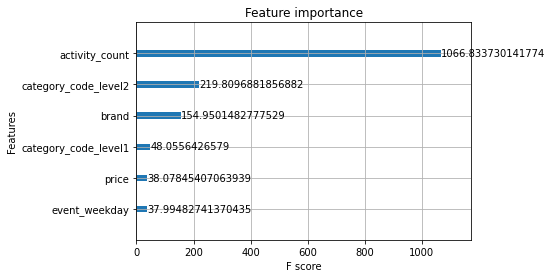

In [38]:
plot_importance(model, max_num_features=10, importance_type ='gain')
plt.rcParams['figure.figsize'] = (40,10)
plt.show()